# Métricas Abrangentes de Sono e Saúde
---

### Contexto

### Objetivo

**Índice**

1. [Importação e Personalização](#importação-e-personalização)
2. [Preparação dos dados](#preparação-dos-dados)
3. [Vizualizações de Distribuição](#vizualizações-de-distribuição)
4. [Modelo RandomForest](#modelo-randomforest)


### Importação e Personalização
---

In [60]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Personalização
%matplotlib inline
plt.rc("figure", figsize=(15, 10))
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

### Preparação dos dados
---

O arquivo **wearable_tech_sleep_quality_1.csv** contém vários valores numéricos com 12 casas decimais. Para melhorar a legibilidade e a clareza dos dados, os valores numéricos foram formatados para 2 casas decimais.

In [30]:
# Carregando DataFrame 
df = pd.read_csv("./wearable_tech_sleep_quality_1.csv").round(2)
df.head(10)

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.93,37.20,1.32,4.64,1.00,107.62,2.77,0.66,7.93
1,67.23,36.96,1.86,6.21,1.00,104.66,3.74,0.14,6.99
2,82.95,36.53,1.21,6.88,10.00,0.00,3.12,0.64,7.66
3,100.46,36.18,1.69,10.33,1.00,116.99,3.90,0.45,9.43
4,65.32,36.85,0.11,8.33,1.00,223.28,4.57,0.64,10.56
5,65.32,36.70,2.21,5.50,7.12,22.58,6.67,0.66,9.14
6,101.58,36.95,2.00,8.23,1.00,254.85,4.36,0.82,8.20
7,85.35,36.82,1.18,5.18,1.00,198.78,1.83,0.77,11.00
8,60.61,37.02,2.66,9.12,2.41,76.58,7.28,0.77,7.37
9,80.85,36.23,2.94,6.79,1.00,135.85,3.33,0.79,10.06


Conforme mostrado nas células a seguir, o DataFrame possui 1000 linhas de valores numéricos e 9 colunas, que são:

- **Heart Rate Variability:** Variabilidade simulada nos intervalos de tempo entre batimentos cardíacos.
- **Body Temperature:** Temperatura corporal gerada artificialmente em graus Celsius.
- **Movement During Sleep:** Dados sintéticos sobre a quantidade de movimento enquanto dorme.
- **Sleep Duration Hours:** Total de horas de sono gerado através de simulação.
- **Sleep Quality Score:** Uma pontuação sintética representando a qualidade do sono.
- **Caffeine Intake (mg):** Quantidade de cafeína simulada consumida em miligramas.
- **Stress Level:** Um índice de níveis de estresse simulados.
- **Bedtime Consistency:** Consistência simulada da rotina de dormir. Escala de 0-1, onde valores mais baixos indicam maior inconsistência.
- **Light Exposure Hours:** Horas sintéticas de exposição à luz durante o dia. Reflete as horas típicas de exposição à luz solar.

O DataFrame está limpo, sem dados ausentes ou duplicados.

In [31]:
# Resumo de informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heart_Rate_Variability  1000 non-null   float64
 1   Body_Temperature        1000 non-null   float64
 2   Movement_During_Sleep   1000 non-null   float64
 3   Sleep_Duration_Hours    1000 non-null   float64
 4   Sleep_Quality_Score     1000 non-null   float64
 5   Caffeine_Intake_mg      1000 non-null   float64
 6   Stress_Level            1000 non-null   float64
 7   Bedtime_Consistency     1000 non-null   float64
 8   Light_Exposure_hours    1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB


In [32]:
# Verificando valores duplicados e ausentes
print(f"""Valores duplicados: {df.duplicated().sum()}\n
Valores ausentes: \n{df.isnull().sum()}
""")

Valores duplicados: 0

Valores ausentes: 
Heart_Rate_Variability    0
Body_Temperature          0
Movement_During_Sleep     0
Sleep_Duration_Hours      0
Sleep_Quality_Score       0
Caffeine_Intake_mg        0
Stress_Level              0
Bedtime_Consistency       0
Light_Exposure_hours      0
dtype: int64



Conforme mostrado na célula da "Estatística Descretiva", podemos fazer a seguinte analise para cada coluna:

1. **Heart_Rate_Variability:** ampla faixa, indicando uma grande variação entre os indivíduos. A média sugere uma variabilidade moderada, que é um indicativo positivo de saúde cardiovascular.
2. **Body_Temperature:** dentro do intervalo normal para a maioria das pessoas.
3. **Movement_During_Sleep:** apresenta valores negativos (por exemplo, -1.02), que indica uma medição fora dos parâmetros normais. Enquanto os altos valores podem refletir agitação ou distúrbios no sono.
4. **Sleep_Duration_Hours:** quase dentro da faixa recomendada para a maioria dos adultos de 8h. No entanto, há uma ampla variação, com alguns indivíduos dormindo significativamente menos ou mais.
5. **Sleep_Quality_Score:**  a maioria das pessoas está apresentando uma qualidade de sono ruim e o resto não.
6. **Caffeine_Intake_mg:** média moderada, com uma grande variação indicando diferentes níveis de consumo entre as pessoas.
7. **Stress_Level:** média moderada, diferenças significativas entre os níveis de estresse dos participantes.
8. **Bedtime_Consistency:** A média sugere uma consistência moderada na hora de dormir. Valores mais próximos de 1 indicam uma consistência maior, o que pode estar associado a uma melhor qualidade do sono.
9. **Light_Exposure_hours:** A exposição média à luz é alta, o que pode influenciar a qualidade do sono.

In [33]:
# Estatística Descretiva 
df.describe()

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,70.386740,36.535520,2.005680,7.471940,2.592890,148.260150,4.94085,0.504090,8.036650
std,19.584339,0.498859,0.983589,1.540611,2.979468,94.031744,2.03256,0.204154,2.023352
min,5.170000,35.030000,-1.020000,3.110000,1.000000,0.000000,0.00000,0.000000,0.330000
25%,57.050000,36.200000,1.350000,6.390000,1.000000,80.627500,3.49000,0.360000,6.730000
50%,70.505000,36.530000,2.000000,7.500000,1.000000,145.715000,4.89000,0.500000,8.040000
75%,82.955000,36.862500,2.662500,8.502500,2.540000,211.242500,6.40250,0.640000,9.352500
max,147.050000,38.100000,5.930000,12.360000,10.000000,400.000000,10.00000,1.000000,14.750000


Com base na análise descritiva da coluna **Movement_During_Sleep**, uma abordagem adequada para lidar com os valores negativos é filtrar esses dados, mantendo apenas os valores iguais ou superiores a 0. Dessa forma, garantimos que os dados analisados estejam dentro dos parâmetros esperados e reflitam corretamente o movimento durante o sono.

In [64]:
# Filtragem de valores negativos na coluna "Movement_During_Sleep"
df = df.loc[df["Movement_During_Sleep"] >= 0]
df

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.93,37.20,1.32,4.64,1.00,107.62,2.77,0.66,7.93
1,67.23,36.96,1.86,6.21,1.00,104.66,3.74,0.14,6.99
2,82.95,36.53,1.21,6.88,10.00,0.00,3.12,0.64,7.66
3,100.46,36.18,1.69,10.33,1.00,116.99,3.90,0.45,9.43
4,65.32,36.85,0.11,8.33,1.00,223.28,4.57,0.64,10.56
...,...,...,...,...,...,...,...,...,...
995,64.38,37.04,2.08,7.54,1.00,167.15,4.40,0.94,8.20
996,105.95,36.49,2.26,4.38,1.00,265.26,6.54,0.57,10.33
997,82.82,36.06,0.76,7.02,8.45,28.26,3.95,0.33,11.18
998,58.58,36.42,2.33,9.97,1.00,196.80,4.99,0.83,6.63


Desbalanceamento na coluna **Sleep_Quality_Score**, onde possui uma grande quantidade de valores concentrados em um número específico (1.00) e poucas observações em outros pontos

In [35]:
# Oberservando a contagem de valores da coluna "Sleep_Quality_Score"
df["Sleep_Quality_Score"].value_counts()

Sleep_Quality_Score
1.00     684
10.00     64
2.90       3
9.73       3
4.02       2
        ... 
8.05       1
6.56       1
4.75       1
8.37       1
7.08       1
Name: count, Length: 205, dtype: int64

Conforme mostrado na matriz de correlação a seguir, observa-se uma correlação negativa de -0,72 entre as variáveis **Sleep_Quality_Score** e **Caffeine_Intake_mg**, o que sugere que o consumo de cafeína pode ter um impacto negativo na qualidade do sono. No entanto, outras variáveis como por exemplo,  **Stress_Level** e **Sleep_Duration_Hours**, que teoricamente deveriam influenciar a qualidade do sono, apresentam correlações próximas de zero com **Sleep_Quality_Score**. 

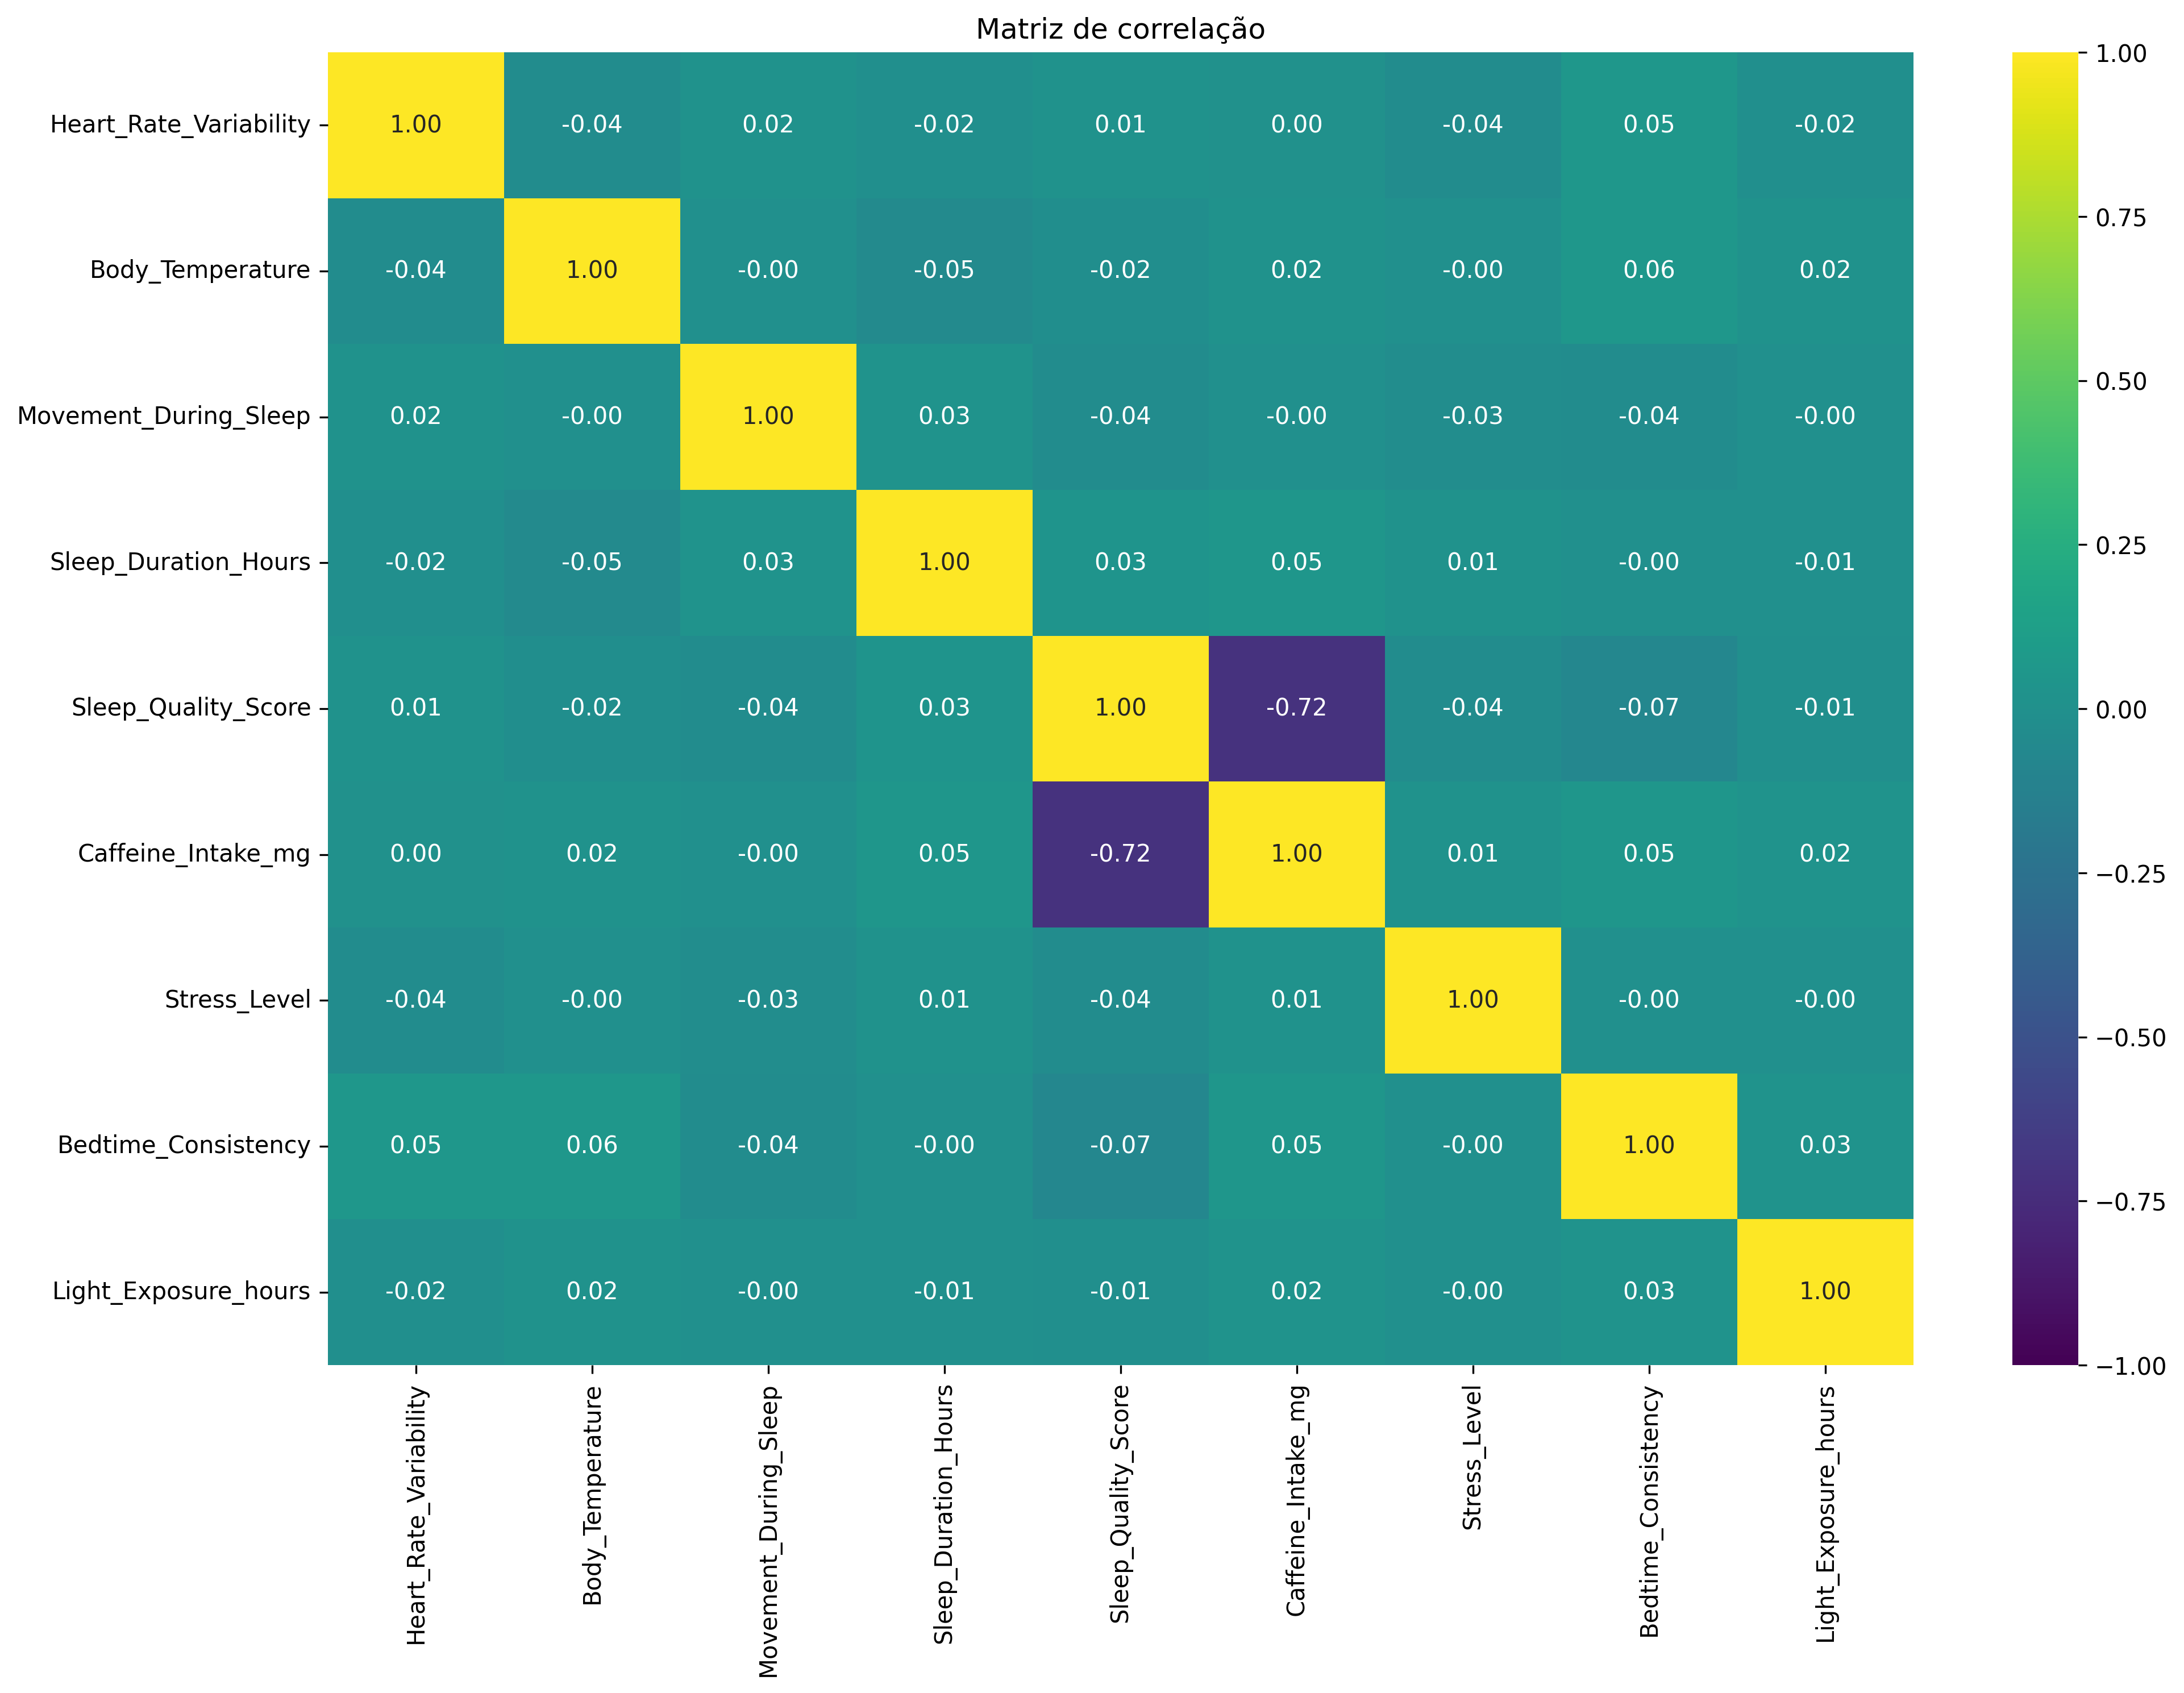

In [36]:
corr_matrix = df.corr()

# Vizualização da matriz de correlação
ax = sns.heatmap(corr_matrix,
                 vmin=-1,
                 vmax=1,
                 cmap="viridis",
                 annot=True,
                 fmt=".2f"
                 )
ax.set_title("Matriz de correlação")
plt.show()

In [37]:
# Correlação de "Sleep_Quality_Score" com todas as outras variáveis
corr_matrix_score = corr_matrix["Sleep_Quality_Score"].sort_values(ascending=False)
corr_matrix_score

Sleep_Quality_Score       1.000000
Sleep_Duration_Hours      0.033626
Heart_Rate_Variability    0.014026
Light_Exposure_hours     -0.013877
Body_Temperature         -0.021851
Stress_Level             -0.035887
Movement_During_Sleep    -0.036804
Bedtime_Consistency      -0.072334
Caffeine_Intake_mg       -0.718591
Name: Sleep_Quality_Score, dtype: float64

Portanto esses resultados indicam que o DataFrame está claramente desbalanceado e que as relações esperadas entre essas variáveis e a qualidade do sono não estão refletidas adequadamente nos dados, sugerindo possíveis inconsistências ou limitações na coleta e na representatividade dos dados.

### Vizualizações de Dispersão
---

O gráfico de dispersão mostra a distribuição dos dados para cada variável em relação à **Sleep_Quality_Score** e a linha de regressão indica a tendência geral da relação.



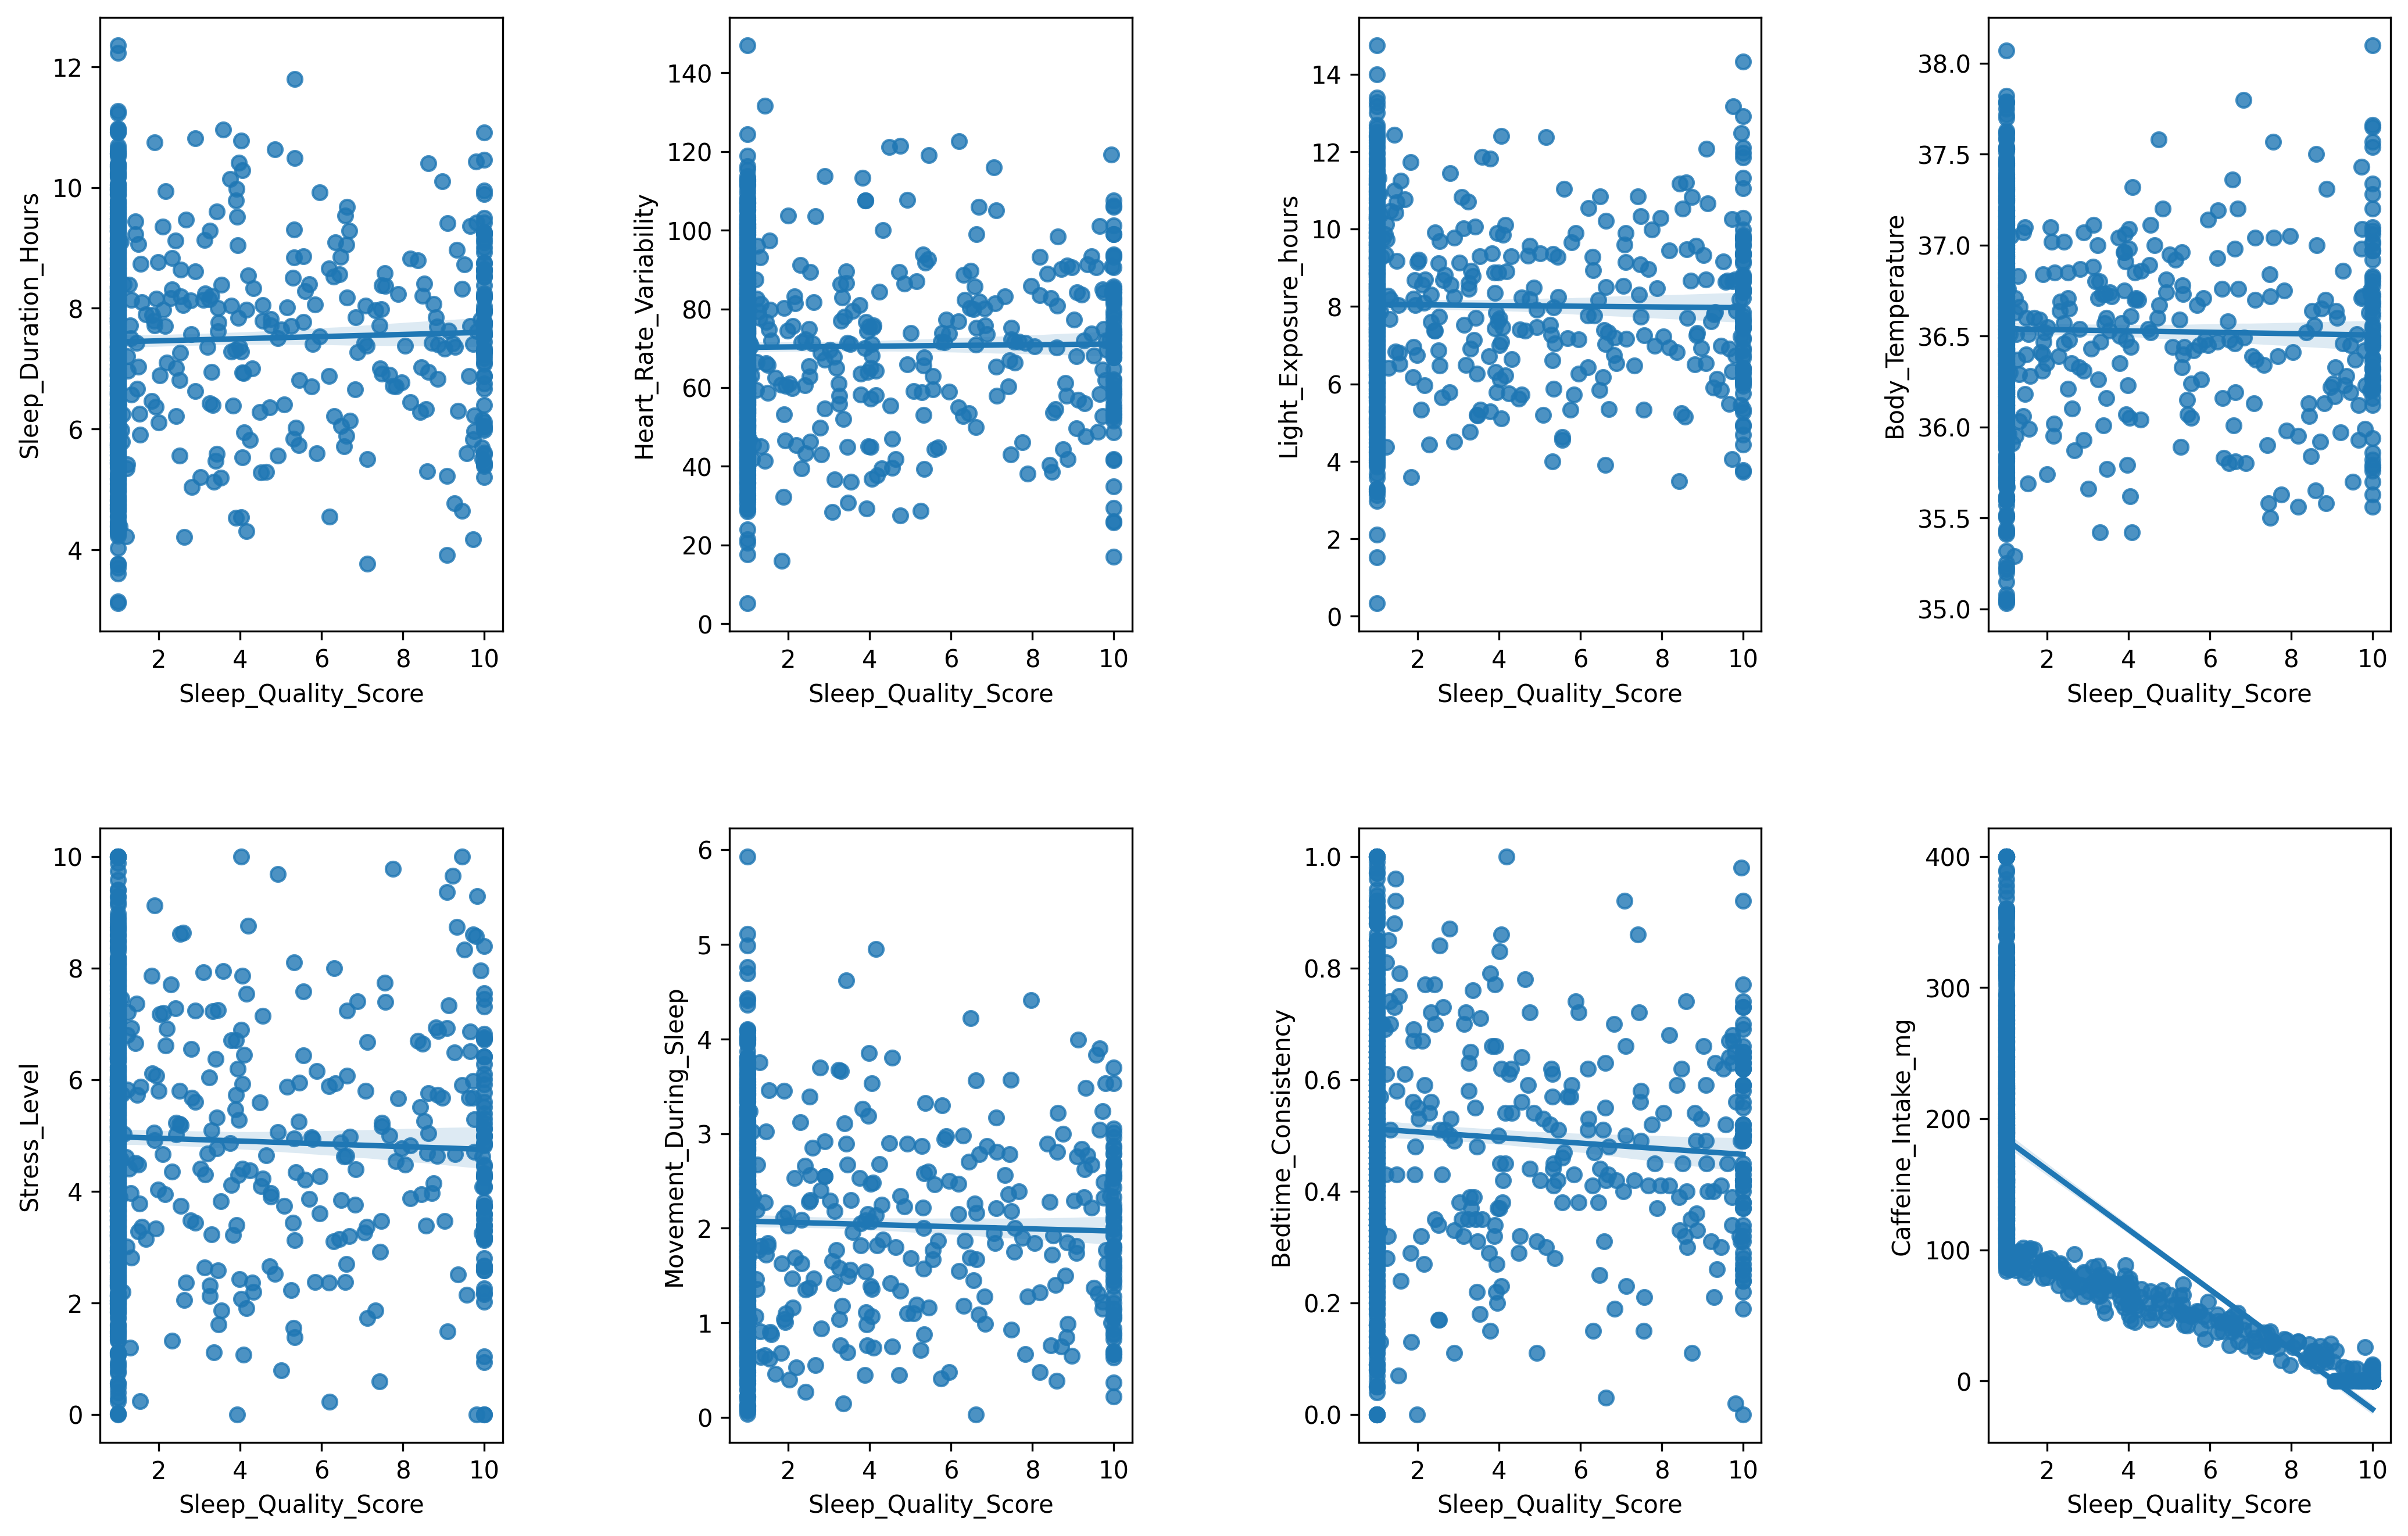

In [66]:
# Variáveis independentes
variaveis = ["Sleep_Duration_Hours", "Heart_Rate_Variability", "Light_Exposure_hours", "Body_Temperature", "Stress_Level", 
         "Movement_During_Sleep", "Bedtime_Consistency", "Caffeine_Intake_mg"]

# Vizualização de gráfico dispersão e regressão
for i, var in enumerate(variaveis, 1):
    plt.subplot(2, 4, i)
    sns.regplot(df, x="Sleep_Quality_Score", y=df[var])

plt.tight_layout(pad=5)
plt.show()

### Modelo RandomForest
---

RMSE: 0.2503914777760165
R² Score: 0.993410430202887


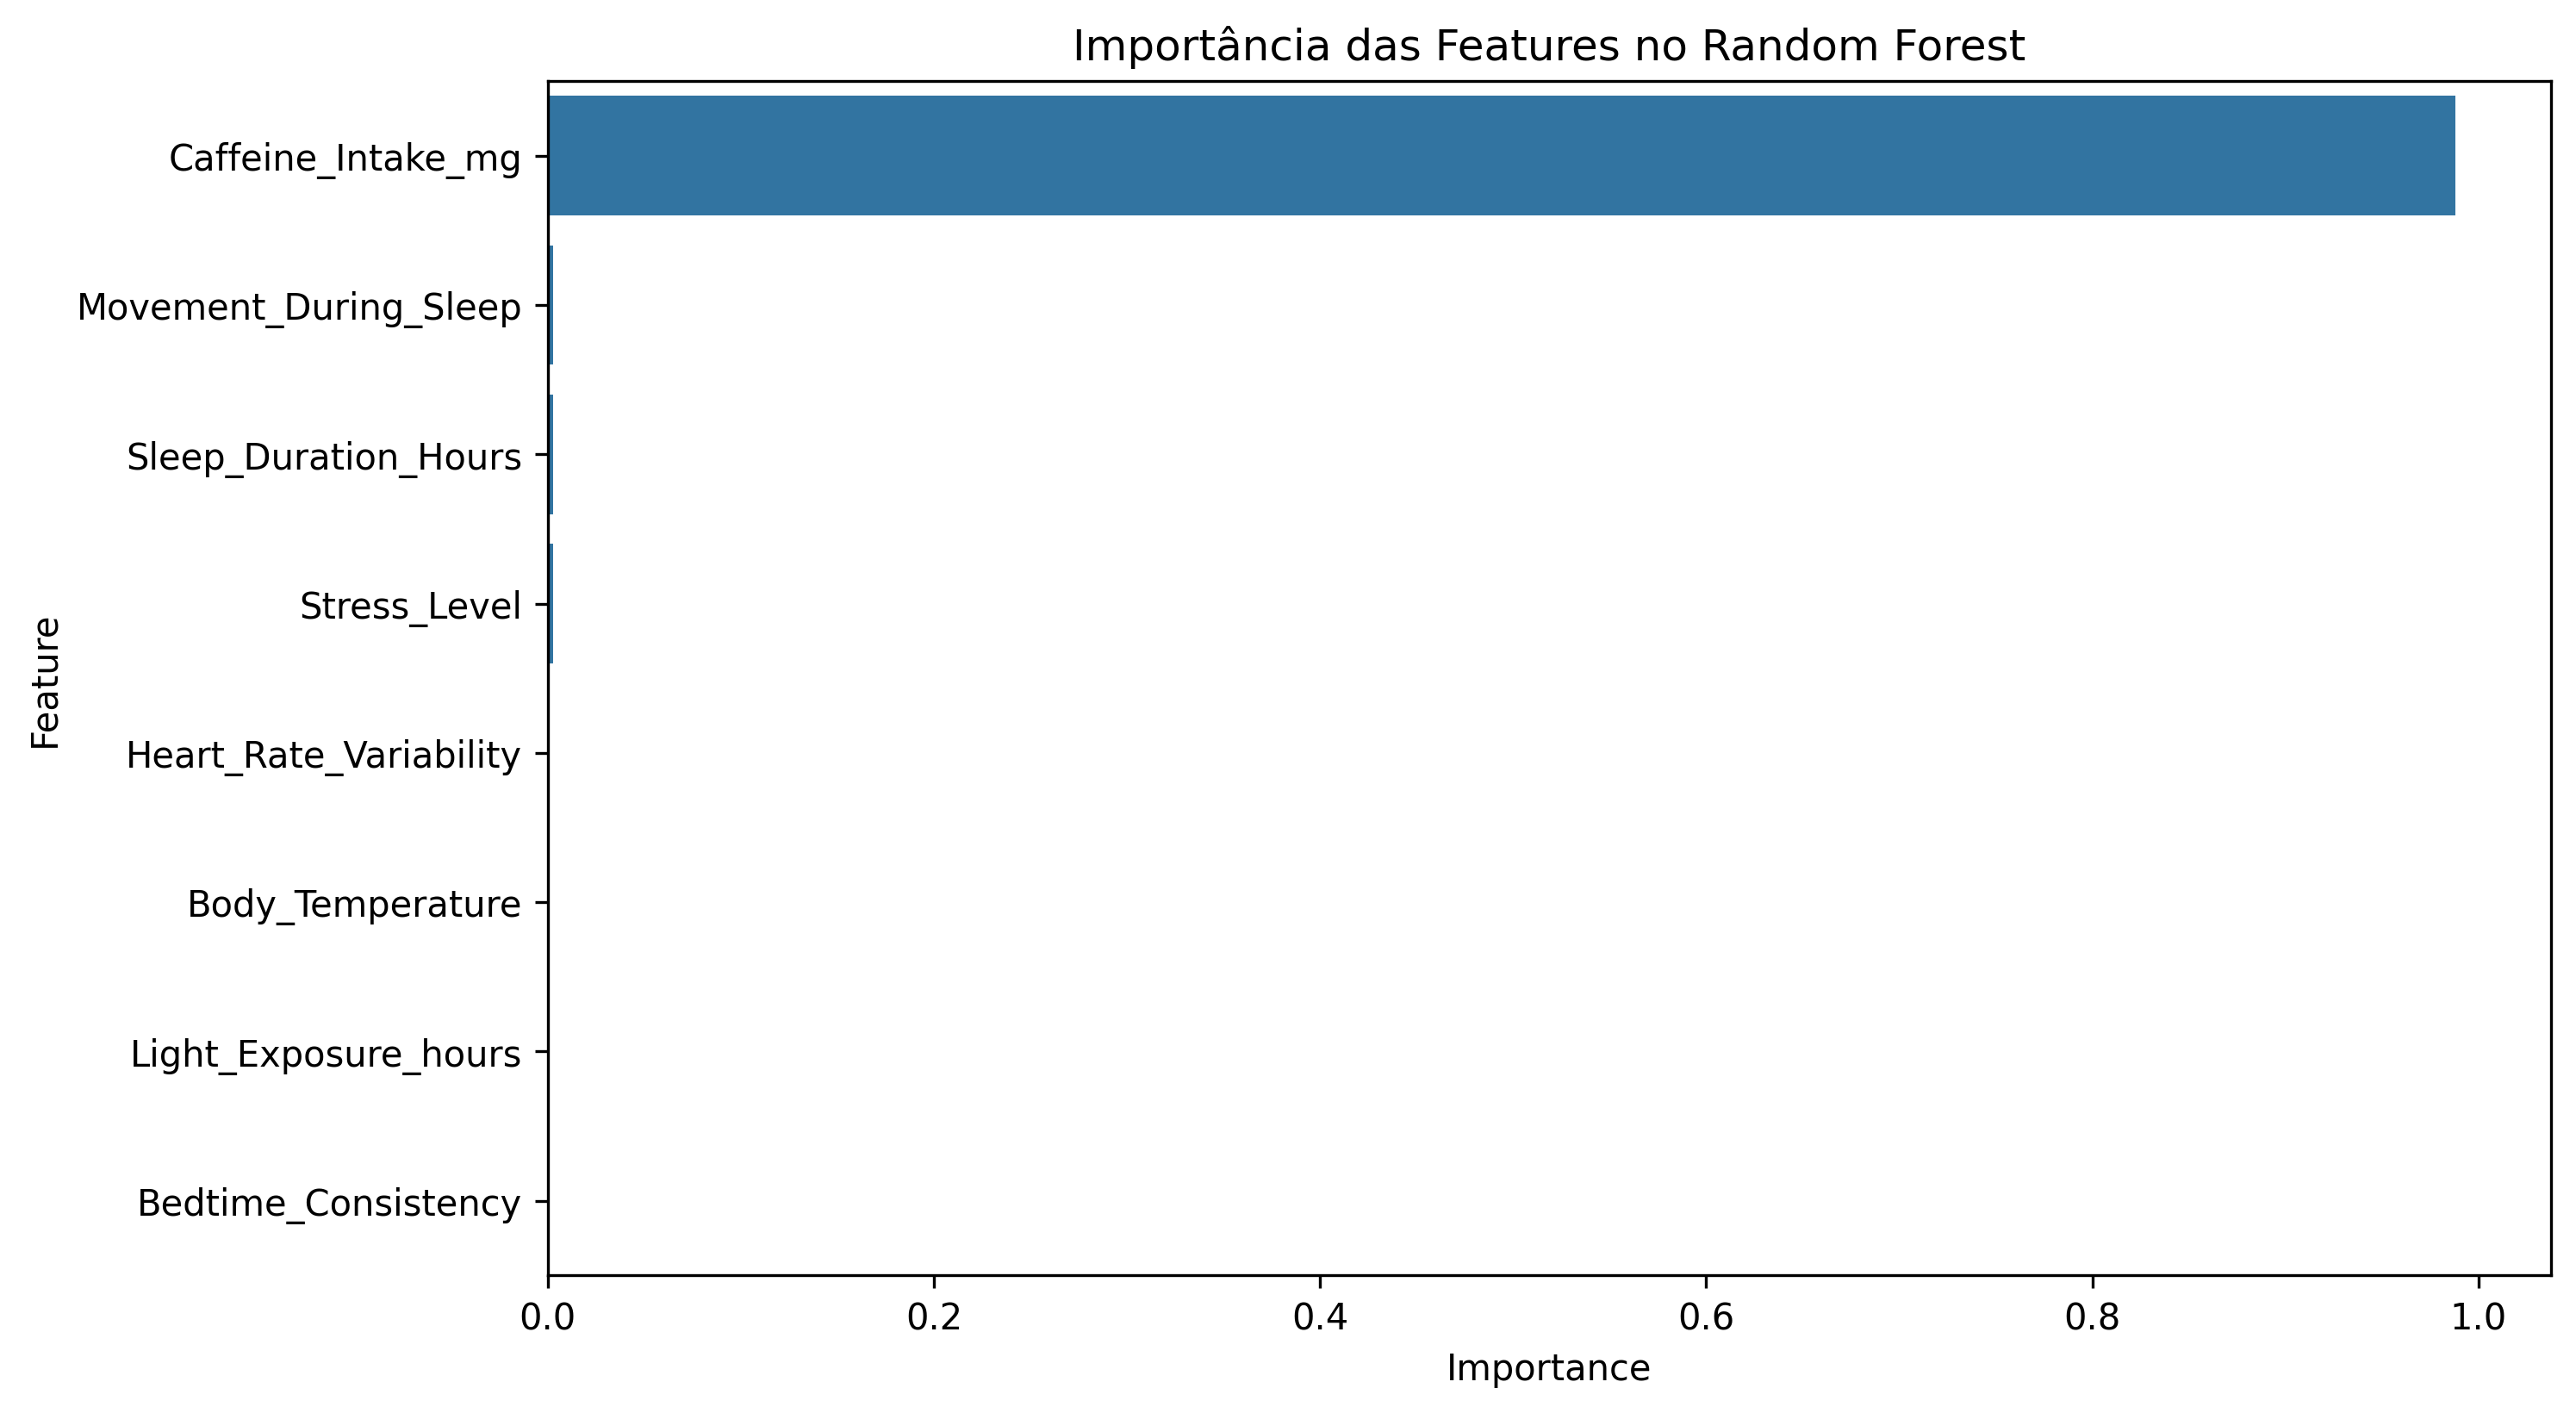

In [59]:
# Separar as variáveis independentes (X) da variável dependente (y)
X = df.drop(columns=['Sleep_Quality_Score'])
y = df['Sleep_Quality_Score']

# Dividir o conjunto de dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo com o conjunto de treino
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

# Importância das Features
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plotar a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importância das Features no Random Forest')
plt.show()